<a href="https://colab.research.google.com/github/thoufiqz55/Python/blob/main/DBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
X=pd.read_csv('/content/drive/MyDrive/techis-ds-wiki/DS/Step 2-5 Unsupervised Learning/03_DBScan/CC GENERAL.csv')
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
X=X.drop('CUST_ID',axis=1)

In [4]:
X.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
X.fillna(method='ffill',inplace=True)
X.head

<bound method NDFrame.head of           BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0       40.900749           0.818182  ...          0.000000      12
1     3202.467416           0.909091  ...          0.222222      12
2     2495.148862           1.000000  ...          0.000000      12
3     1666.670542           0.636364  ...          0.000000      12
4      817.714335           1.000000  ...          0.000000      12
...           ...                ...  ...               ...     ...
8945    28.493517           1.000000  ...          0.500000       6
8946    19.183215           1.000000  ...          0.000000       6
8947    23.398673           0.833333  ...          0.250000       6
8948    13.457564           0.833333  ...          0.250000       6
8949   372.708075           0.666667  ...          0.000000       6

[8950 rows x 17 columns]>

In [8]:
# #Preprocessing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
# # Normalizing the data so that
# # the data approximately follows a Gaussian distribution

x_norm = normalize(x_scaled)
# # Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(x_norm)

In [9]:
#Reducing the dimensionality of the data to make it visualizable

pca = PCA(n_components= 2)
x_principal = pca.fit_transform(X_normalized)
#x_principal = pca.fit_transform(X)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1',"P2"]
print(x_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544826
2  0.330633  0.268881
3 -0.481655 -0.097616
4 -0.563512 -0.482505


Building the cluster model

In [10]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(x_principal)
labels = db_default.labels_

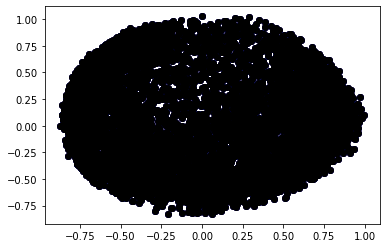

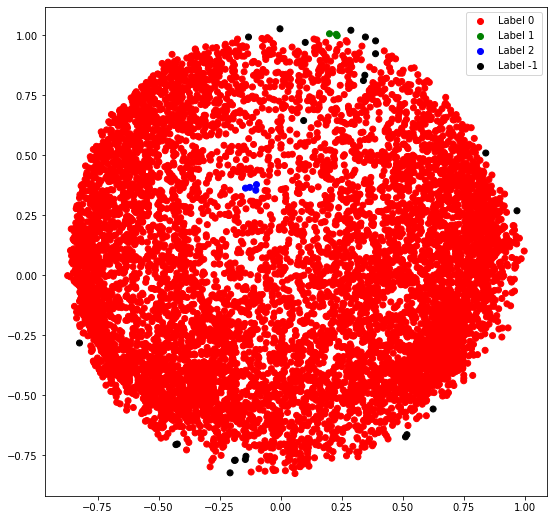

In [11]:
color= {}
color[0] = 'r'
color[1] = 'g'
color[2] = 'b'
color[-1] = 'k'

# Building the colour vector for each data point
cvec = [color[label] for label in labels]

r = plt.scatter(x_principal['P1'],x_principal['P2'], color = 'r')
g = plt.scatter(x_principal['P1'],x_principal['P2'], color ='g')
b = plt.scatter(x_principal['P1'],x_principal['P2'], color ='b')
k = plt.scatter(x_principal['P1'],x_principal['P2'], color ='k')

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined

plt.figure(figsize = (9,9))
plt.scatter(x_principal['P1'],x_principal['P2'],c = cvec)

#Building the legend
plt.legend((r,g,b,k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

In [24]:
#Tuning the Parameter of the Model
X_principal = x_principal.copy()
db = DBSCAN(eps = 0.077, min_samples = 20).fit(X_principal)
labels1 = db.labels_
labels1

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
len(set(labels1))


2

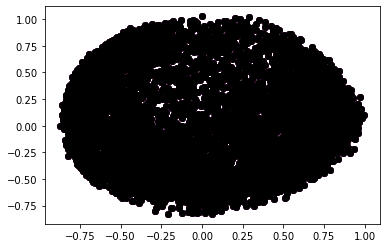

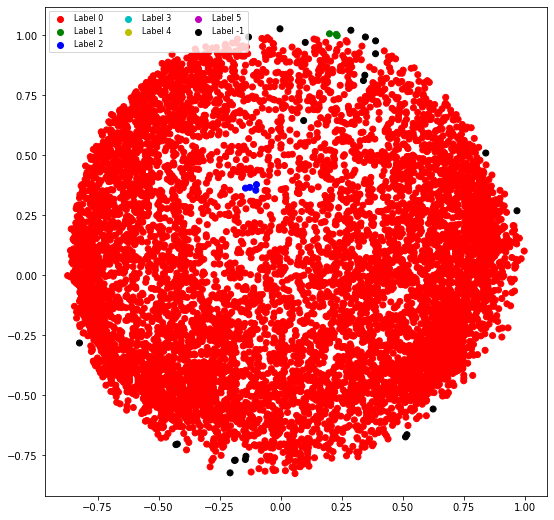

In [26]:
#Visualizing the changes

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])

plt.figure(figsize = (9,9))
plt.scatter(X_principal['P1'], X_principal["P2"], c = cvec)

plt.legend((r, g, b, c, y, m, k),
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4','Label 5', 'Label -1'),
		scatterpoints = 1,
		loc ='upper left',
		ncol = 3,
		fontsize = 8)
plt.show()

In [27]:
from sklearn import metrics
print(metrics.silhouette_score(X_principal,labels1))

0.2215867202728835
